In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, segmentation, color, measure, morphology, filters
#from skimage.future import graph
from skimage.segmentation import felzenszwalb

TypeError: mark_boundaries() got an unexpected keyword argument 'channel_axis'

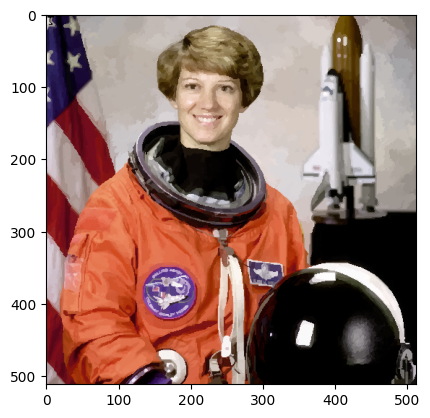

In [50]:
#image = io.imread('/home/apd/Projects/ImageAnalysis/example_neuron_images/Project_BK1-11_40x_CNT_s11_ch00.tif')
# n_segments: number of superpixels to generate
# compactness: balances color proximity and space proximity. Higher values -> more square/circular superpixels.
# start_label: labeling of superpixels starts at 1 by default.

image = data.astronaut()
superpixels = segmentation.slic(image, n_segments=1000, compactness=0.1, start_label=1, channel_axis=None)

# The SLIC output is a label matrix where each pixel is assigned a superpixel ID.
# To visualize, we often display the boundaries of superpixels over the original image.
image_rgb = color.gray2rgb(image)
segments = felzenszwalb(image, scale=10, sigma=0.5, min_size=10)
plt.imshow(color.label2rgb(segments, image, kind='avg'))

boundaries = segmentation.mark_boundaries(segments, superpixels)

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(boundaries)
ax2.set_title('Image with SLIC Superpixel Boundaries')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(image.shape)

(512, 512, 3)


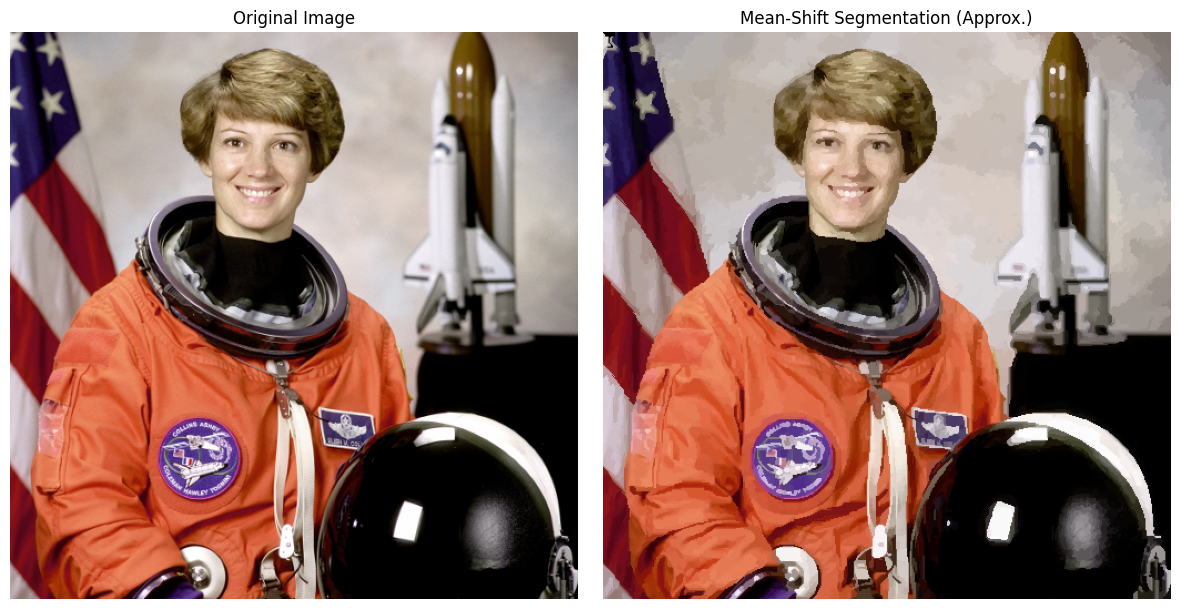

In [43]:


image = data.astronaut()

# Convert to LAB color space for better segmentation
image_lab = color.rgb2lab(image)
print(image.shape)
# Preprocess with Gaussian blur
#image_smooth = gaussian(image_lab, sigma=2, multichannel=True)

# Apply mean-shift segmentation (via Felzenszwalb approximation)
segments = felzenszwalb(image, scale=10, sigma=0.5, min_size=10)

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(color.label2rgb(segments, image, kind='avg'))
ax[1].set_title("Mean-Shift Segmentation (Approx.)")
ax[1].axis('off')

plt.tight_layout()
plt.show()
